# Probando Clasificación con Gradiente descendente

In [182]:
import numpy as np
import matplotlib.pyplot as plt

In [585]:

mean00 = [10,10]
mean01 = [15,20]

cov00 = [[8,1],[1,8]]
cov01 = [[2,1],[1,2]]


class00 = np.random.multivariate_normal(mean00, cov00, size=100, check_valid='warn', tol=1e-8)
class01 = np.random.multivariate_normal(mean01, cov01, size=100, check_valid='warn', tol=1e-8)

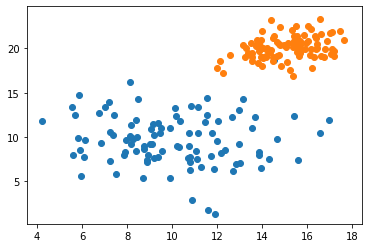

In [586]:
plt.scatter(class00[:,0],class00[:,1])
plt.scatter(class01[:,0],class01[:,1])

In [587]:
zeros = np.zeros(len(class00)).T
labeled_class00 = np.append(class00,np.transpose([zeros]),axis=1)
labeled_class01 = np.append(class01,np.transpose([zeros])+1,axis=1)
labeled_classes = np.append(labeled_class00,labeled_class01,axis=0)
len(labeled_classes)

200

Definimos nuestra función de "costo". Decidimos implementar la derivada de la verosimilitud 

$\frac{\partial LL(\theta)}{\partial \theta_j} = \sum_{i=1}^n [y_i-sigm(\theta^T\mathbf{x}_i)]x_j$

In [588]:
#La programación de la derivada de la función de costo 

param = [2,1]



def pd(x,y,a):
    s = 0
    
    for i in np.arange(len(x)):
        dif = ((y[i]-a*x[i]))
        s = s + dif*(x[i])
    return s

In [589]:
bias = 0
n = 0.001
sigm = lambda x: 1/(1 + np.exp(-x))


#inicializar parametros theta

m = len(x)
param = [1,2]

#repetir varias veces
for k in range(1000):
    
    #inicializar gradiente
    g = np.zeros(m)

    #por cada tupla (x,y)
    for v in labeled_classes:
        s = 0
        x = v[:2]
        y = v[2]
        
        # por cada parametro
        for j in np.arange(m):
            line = np.matmul(param,x)
            g[j] += (y-sigm(line))*x[j]
            
    param += n*g



In [590]:
param
bias

0

In [591]:
x = labeled_classes[0][:2]
y = labeled_classes[0][2]
print(x)
print(y)


[ 9.49374221 11.04451587]
0.0


In [592]:
def f(x):
    return sigm(np.matmul(x,param))
    

pred = (np.array(list(map(f,labeled_classes[:,0:2])))>0.5)*1
print("errores de clasificación: ", np.sum((pred-labeled_classes[:,2])**2))


errores de clasificación:  65.0


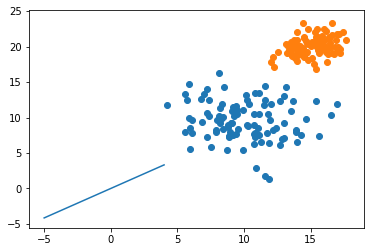

In [593]:
X = np.arange(-5,5)


plt.plot(X,(-param[0]/param[1])*X)
plt.scatter(class00[:,0],class00[:,1])
plt.scatter(class01[:,0],class01[:,1])
plt.show()

Ahora considerando: $x_0w_0$ con $x_0 =  1$

In [663]:


n = 0.0001
sigm = lambda x: 1/(1 + np.exp(-x))
#inicializar parametros theta
#param = [0,0]

#w_0 es bias
#bias = 0

#hparam = param

#repetir varias veces
for k in range(10000):
    
    #inicializar gradiente parametros + bias
    g = np.zeros(len(x)+1)

    #por cada tupla (x,y)
    for v in labeled_classes:

        x = v[:2]
        y = v[-1:]
        
        # por cada parametro
        line = np.matmul(x,param)+1*bias
        for j in np.arange(len(x)):
            
            g[j]+=(y-sigm(line))*x[j]
        
        
        g[2] += (y-sigm(line))*1

        
    param += n*g[:2]
    bias += n*g[2]

    
print(param)    
print(bias)

[0.126039   0.78173643]
-13.757589352440148


In [664]:
def f(x):
    return sigm(np.matmul(x,param)+bias)



pred = (np.array(list(map(f,labeled_classes[:,0:2])))>0.5)*1

In [665]:
np.sum((pred - labeled_classes[:,2])**2)

1.0

In [666]:
# incorporando el bias mejora la clasificación un poco mas

In [667]:
bias

-13.757589352440148

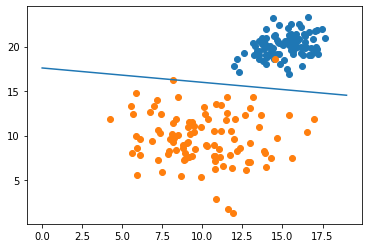

In [668]:
X = np.arange(0,20)

plt.plot(X,(-param[0]/param[1])*X-bias/param[1])
plt.scatter(class01[:,0],class01[:,1])
plt.scatter(class00[:,0],class00[:,1])
plt.show()